<a href="https://colab.research.google.com/github/Avelez164/Job-Salaries-Regression-Analysis/blob/main/CPSC483_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Import Dataset from Kaggle#






In [ ]:
import kagglehub

# Define the dataset identifier
dataset = "samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025"

# Download the latest version of the dataset
path = kagglehub.dataset_download(dataset)

print("Path to dataset files:", path)

100%|██████████| 581k/581k [00:00<00:00, 34.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/versions/1


In [ ]:
!ls /kaggle/input/the-global-ai-ml-data-science-salary-for-2025

salaries.csv


In [ ]:
!pip install country_converter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as cc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')

###2. Data Preprocessing#

In [ ]:
df = df[df['salary_in_usd'] < 400000]
df.isnull().sum()
df.drop_duplicates()
nsamp, natt = df.shape
print("Number of samples = {0:d} and number of attributes = {1:d} after preprocessing".format(nsamp,natt))

Number of samples = 87923 and number of attributes = 11 after preprocessing


###3. Organize Data Labels#

In [ ]:
experience_level= {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive-level"
}

employment_type = {
    "PT": "Part-time",
    "FT": "Full-time",
    "CT": "Contract",
    "FL": "Freelance"
}

company_size = {
    "S": "Small",
    "M": "Medium",
    "L": "Large"
}

df["experience_level"] = df["experience_level"].map(experience_level)
df["employment_type"] = df["employment_type"].map(employment_type)
df["company_size"] = df["company_size"].map(company_size)

# converted_country = cc.convert(names=df['company_location'], to="ISO3")
# df['company_location'] = converted_country

###4. Plot Salary Distribution#

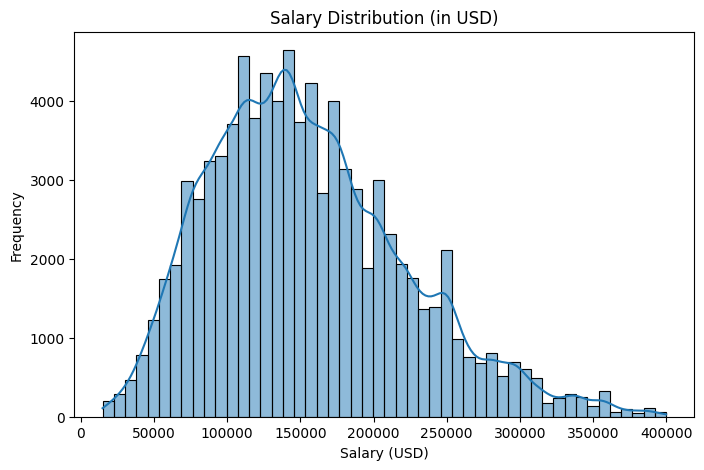

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution (in USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

###5. Plot Average Salary by Experience Level

<ipython-input-241-02c3fc5b3ab0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_salary.index, y=exp_salary.values, palette='viridis')


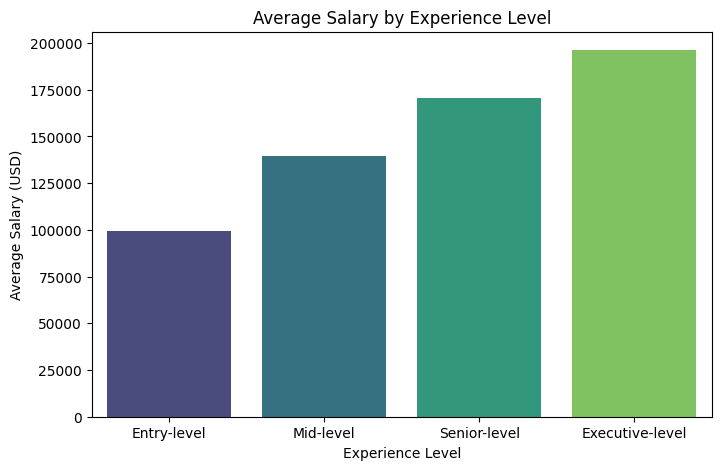

In [ ]:
plt.figure(figsize=(8,5))
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
sns.barplot(x=exp_salary.index, y=exp_salary.values, palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

###6. Plot Average Salary By Country

<ipython-input-242-4fcf4225f072>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_salary.head(10).values, y=country_salary.head(10).index, palette='coolwarm')


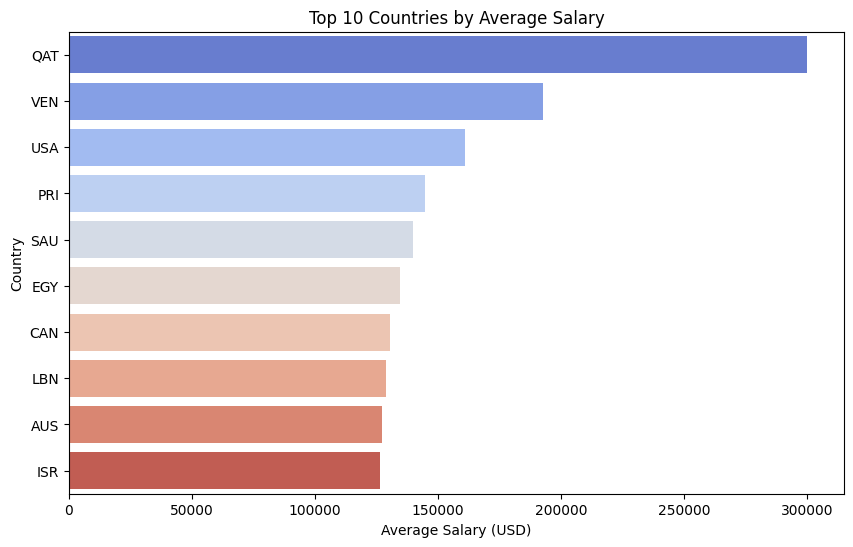

In [ ]:
plt.figure(figsize=(10,6))
country_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=country_salary.head(10).values, y=country_salary.head(10).index, palette='coolwarm')
plt.title('Top 10 Countries by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.show()

###7. Setup Feature Matrix and Target Vector

In [ ]:
features_df = df.drop(['salary_currency'], axis=1)
print(features_df.columns)
features_df = pd.get_dummies(features_df, columns=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'])
#trained_columns = features_df.columns # keep track of number of features after one hot encoding

X = features_df.drop('salary_in_usd', axis=1)
trained_columns = X.columns
y = features_df['salary_in_usd']

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X) # Apply normalization to feature matrix

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


###8. Train Model Using Regression Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
decision_tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

# Train models on training data
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.665e+13, tolerance: 3.190e+10
  model = cd_fast.enet_coordinate_descent(


DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

###9. Test Model Using Training Data

In [ ]:
# Test models on test data
y_pred_lr = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_dt = decision_tree_reg.predict(X_test)

def model_analysis(y_test, y_pred, model_name):
    y_pred = (y_pred)
    y_true = (y_test)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name}:")
    print(f"R^2 Value: {r2:.6f}")
    print(f"Mean Squared Error: {mse:,.2f}")
    print("-" * 50)

# Evaluate models
model_analysis(y_test, y_pred_lr, "Multi-Linear Regression without Regularization")
model_analysis(y_test, y_pred_ridge, "Ridge Regression")
model_analysis(y_test, y_pred_lasso, "Lasso Regression")
model_analysis(y_test, y_pred_dt, "Decision Tree Regression")

Multi-Linear Regression without Regularization:
R^2 Value: 0.415758
Mean Squared Error: 2,625,454,457.81
--------------------------------------------------
Ridge Regression:
R^2 Value: 0.416689
Mean Squared Error: 2,621,270,781.42
--------------------------------------------------
Lasso Regression:
R^2 Value: 0.416319
Mean Squared Error: 2,622,933,803.55
--------------------------------------------------
Decision Tree Regression:
R^2 Value: 0.934926
Mean Squared Error: 292,427,376.69
--------------------------------------------------


###10. Plot Predicted Salaries

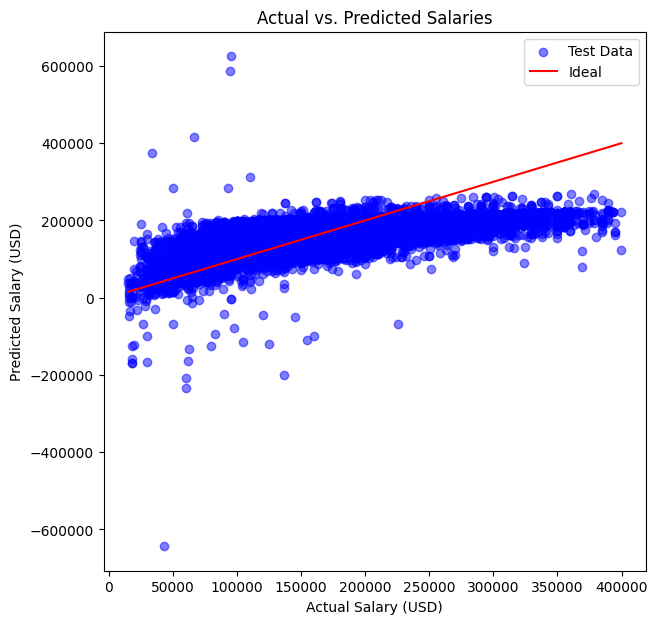

In [ ]:
y_pred = (y_pred_ridge)
y_true = (y_test)
plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Test Data')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r-', label='Ideal')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

###11. Plot Residuals

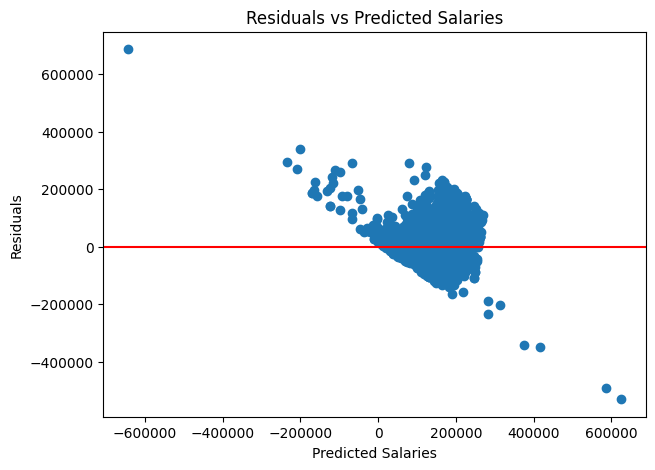

In [ ]:
residuals = y_true - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salaries')
plt.show()

###12. Use Coefficents to Determine Most Important Features

In [ ]:
coef = pd.Series(linear_reg.coef_, index=X.columns).sort_values(ascending=False)

print("\nTop Factors that Increase Salary:")
print(coef.head(10))

print("\nTop Factors that Decrease Salary:")
print(coef.tail(10))


Top Factors that Increase Salary:
employee_residence_ID               300963.622885
company_location_HU                 275446.116605
job_title_Data Science Tech Lead    200795.831332
employee_residence_CN               130850.304042
company_location_NG                 126514.424324
job_title_AWS Data Architect        121951.447159
company_location_HR                 120797.808845
job_title_Applied AI ML Lead        119588.685165
employee_residence_DK               118225.784137
job_title_Marketing Data Analyst    111708.547145
dtype: float64

Top Factors that Decrease Salary:
company_location_MD                  -1.223992e+05
employee_residence_IN                -1.304986e+05
job_title_Data Scientist Lead        -1.315224e+05
employee_residence_HR                -1.370929e+05
job_title_Manager Data Management    -1.434111e+05
job_title_Principal Data Architect   -1.478257e+05
employee_residence_JP                -2.217207e+05
company_location_CL                  -2.720593e+05
company

###13. Use Model to Make Predictions on an Independent Dataset

In [ ]:
# Define the dataset identifier
dataset = "ruchi798/data-science-job-salaries"

# Download the latest version of the dataset
path = kagglehub.dataset_download(dataset)


In [ ]:
!ls /kaggle/input/data-science-job-salaries/ds_salaries.csv

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [ ]:
df2 = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv', index_col=0)
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:

df2["experience_level"] = df2["experience_level"].map(experience_level)
df2["employment_type"] = df2["employment_type"].map(employment_type)
df2["company_size"] = df2["company_size"].map(company_size)

converted_country = cc.convert(names=df2['company_location'], to="ISO3")
df2['company_location'] = converted_country
df2 = df2[df2['salary_in_usd'] < 400000]
features_df2 = df2.drop(['salary_currency'], axis=1)

features_df2 = pd.get_dummies(features_df2, columns=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'])


X2 = features_df2.drop('salary_in_usd', axis=1)
X_updated_features = X2.reindex(columns=trained_columns, fill_value=0) # realign features

y = features_df2['salary_in_usd']

In [ ]:
y_pred_ridge = ridge_reg.predict(X_updated_features)
model_analysis(y, y_pred_ridge, "Ridge Regression")


Ridge Regression:
R^2 Value: -4.026066
Mean Squared Error: 18,526,101,986.14
--------------------------------------------------
